# Lab 3: Motion of falling objects

**Goal:** Introduce a method for obtaining numerical solutions to
  Newton's equations of motion and discuss the qualitative and
  quantitative behavior of bodies falling near Earth's surface.



## 1-D motion

- Start with one dimensional motion (vertical). The equations of
  motion are

\begin{equation}
v(t) = \frac{dz(t)}{dt}
\end{equation}

and

\begin{equation}
a(t) = \frac{dv(t)}{dt}
\end{equation}

where 

\begin{equation}
a(t) = \frac{1}{m}F(z,v,t)
\end{equation}

- The description of motion requires the  solution of the two
  coupled first-order differential equations.  One could combine to
  obtain a second-order differential equation for position, i.e., 
  
\begin{equation*}
\frac{d z^2(t)}{dt^2} = \frac{F}{m}
\end{equation*}

- In the absence of air resistance, all objects have the same
  acceleration at the same point near the Earth's surface.  We call
  this ``free fall''.
- The acceleration of the freely falling object is denoted as $g
  \approx 9.8$ m/s$^2$.
- Adopt a coordinate system  with the positive direction down so
  that $a = +g$.  The solution to the second-order ODE (by
  integration) is

\begin{equation*}
v(t) = v_0 + gt
\end{equation*}

and

\begin{equation*}
z(t) = z_0 + v_0t + \frac{1}{2}gt^2
\end{equation*}

where $z_0$ and $v_0$ are the initial position and velocity of the
object.
- In general the force due to Earth on an object of mass $m$ is

\begin{equation*}
F = \frac{GMm}{(R+z)^2}
\end{equation*}

where $z$ is measured from the Earth's surface, $R$ is Earth's radius,
$G$ is the gravitational constant, $M$ is Earth's mass, and $g = GM/R^2$.

- Now consider the effects of air resistance. It can be shown that
  air resistance is a force that is proportional to the square of
  the velocity, and it acts in a direction opposite to the velocity
  vector:

\begin{equation*}
{F}_{d} =  \frac{1}{2} C_d \rho A v^2 = k v^2
\end{equation*}

where $k = \frac{1}{2}C_d \rho A$.
- Here $C_d$ is the drag coefficient that is dependent on the
  shape of the projectile (i.e., $0<C_d<1$), $A$ is the
  cross-sectional area of the projectile, and $\rho$ is the density of
  air (or density of fluid that the projectile is moving through).
- For vertical motion (drag acts upward, or in the negative direction)

\begin{equation*}
 F = F_g - F_{d} = mg - F_{d}
\end{equation*}

- Since $F_{d}(v)$ increases as $v$ increases, there is a
  limiting or *terminal* speed at which $F_g = F_d$.  The terminal
  speed is

\begin{equation*}
v_t = \left ( \frac{mg}{k}\right)^{1/2}
\end{equation*}

- The net force on the falling object is

\begin{equation*}
F = mg - F_d = mg  - k v_t^2 \left (\frac{v^2}{v_t^2} \right) =  mg
\left(1-  \frac{v^2}{v_t^2} \right)
\end{equation*}

- For a pebble of radius 0.01 m, $k$ is found empirically to be $k
  \approx 10^{-4}$ kg/m.  The terminal speed is about 30 m/s.
  Terminal speed is achieved in about 3 seconds or in a vertical fall
  of about 50 m.
  
- Solve as coupled first-order differential equations with Euler algorithm.

\begin{equation*}
t^n = t^0 + n \Delta t
\end{equation*}
where superscript $n$ is the time step index, or $t^n$ is the $n$th
step.

\begin{equation*}
v^{n+1} = v^n + a^n \Delta t
\end{equation*}

and

\begin{equation*}
z^{n+1} = z^n + v^n \Delta t
\end{equation*}

- Note that $v^{n+1}$ is determined by $a^n$ at the *beginning* of the interval.  Similarly, $z^{n+1}$ is determined by $v^{n}$ at the *beginning* of the interval.



### Exercise 1: Free fall

1. Write a Python program to implement the Euler method for the motion of a freely falling object.
2. Use your program to determine the time-dependence of the velocity and position of a freely falling object near the Earth's surface. Assume the initial values $z=0$ m, *height* = 10 m, and $v=0$ (m/s).  The parameter *height* is the initial distance of the Earth's surface from the origin.  Note that $+z$ is in the downward direction.  What is a suitable value of $\Delta t$?  Compare your output with the exact result.
3. Plot $z(t)$ and $v(t)$.
4. Now add air resistance. The table below shows the vertical fall of a styrofoam ball of mass 0.254 gm and a radius of 2.54 cm.  Determine the value of the terminal velocity which yields the best agreement between the computed values of $z(t)$ and the experimental values.

|t(s)| position (m)|
|----------:|-----------:|
|-0.132| 0.0|
| 0.0 | 0.075 |
| 0.1 | 0.260 |
| 0.2 | 0.525 |
| 0.3 | 0.870 | 
| 0.4 | 1.27 |
| 0.5 | 1.73 |
| 0.6 | 2.23 |
| 0.7 | 2.77 |
| 0.8 | 3.35 |



Text(0, 0.5, 'position')

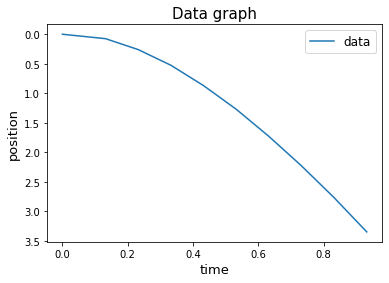

In [28]:
# 1-D free fall motion near the Earth's surface.  
import numpy as np
import matplotlib.pyplot as plt
import math as m
#---------------------------------------------------------------------------------------------------------------------------
x0 = 0           #initial position 
v0 = 0           #the initial velocity
h = 10           #height (meters)
dt = 0.05        #time step 
t = 0            #initial time
g = 9.81         #m/s^2
#----------------------------------------Euler free fall w/o drag-------------------------------------------------------
def euler_no_drag(x0,v0,h,dt):      
    #x0 is initial position
    #v0 is the initial velocity
    #h is the height
    #dt is the time step
    v = []                #initialize an array for the velocity output
    x = []                #initialize an array for the position output
    xp = 0.0245           #n+1 value
    t = 0                 #initial time
    time = []             #initialize an array for the time output
    while xp < h:         #run until object reaches the ground, watch out for infinite loops!
        time.append(t)
        v.append(v0)
        x.append(x0)
        vp = v0 + g*dt             #velocity update        
        xp = x0 + v0*dt            #position update         
        v0 = vp                    #update the velocity, v^n = v^n+1
        x0 = xp                    #update the position, x^n = x^n+1
        t = t+dt                   #update time
    return x,v,time

#----------------------------------------Euler free fall WITH drag.---------------------------------------------------------

v_t = 6.36             #terminal velocity (m/s) (free parameter variable)
h = 10
x0 = 0
v0 = 0
t = 0

def euler_drag(x0,v0,t,h,dt,v_t):  #euler free fall with drag.
    #x0 is initial position
    #v0 is the initial velocity
    #t is the initial time
    #h is the height
    #dt is the time step
    #v_t is the terminal velocity
    v = []                  #initialize an array for the velocity output
    x = []                  #initialize an array for the position output
    xp = 0.0245             #n+1 value
    t = 0                   #initial time
    time = []               #initialize an array for the time output
    #add your code here
    while xp < h:                       #run until object reaches the ground, watch out for infinite loops!
        time.append(t)
        v.append(v0)
        x.append(x0)
        vp = v0 + (g-g*(v0/v_t)*np.abs(v0/v_t))*dt  #velocity update        
        xp = x0 + v0*dt                 #position update         
        v0 = vp                         #update the velocity, v^n = v^n+1
        x0 = xp                         #update the position, x^n = x^n+1
        t = t+dt                        #update time 
    return x,v,time

#---------------------------------------------End of functions--------------------------------------------------------------

[x,v,time] = euler_no_drag(x0,v0,h,dt)                 #recalling functions and defining to specific variables
[xd,vd,time_d] = euler_drag(x0,v0,t,h,dt,v_t)          #recalling again (for function with drag)
#x = position
#v = velocity 

#styrofoam ball-------------------------------------------------------------------------------------------------------------
ts = [0.0,0.132,0.232,0.332,0.432,0.532,0.632,0.732,0.832,0.932]     #rewrote time data so start at time = 0
zs = [0.0,0.075, 0.260, 0.525, 0.870, 1.27, 1.73, 2.23, 2.77, 3.35]
#graphing-------------------------------------------------------------------------------------------------------------------
#Data graph
plt.plot(ts,zs,label = "data")
plt.legend(fontsize = 12)
plt.gca().invert_yaxis()    #command for inverting y-axis
plt.title("Data graph",fontsize = 15)
plt.xlabel("time",fontsize = 13)
plt.ylabel("position",fontsize = 13)

Text(0, 0.5, 'position(m) and velocity(m/s)')

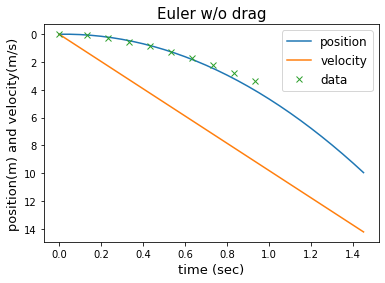

In [29]:
#Graph for Euler w/o drag
plt.plot(time,x,label = "position")
plt.plot(time,v,label = "velocity")
plt.plot(ts,zs,"x",label = "data")
plt.legend(fontsize = 12)
plt.gca().invert_yaxis()
plt.title("Euler w/o drag",fontsize = 15)
plt.xlabel("time (sec)",fontsize = 13)
plt.ylabel("position(m) and velocity(m/s)",fontsize = 13)

Text(0, 0.5, 'position(m) and velocity(m/s)')

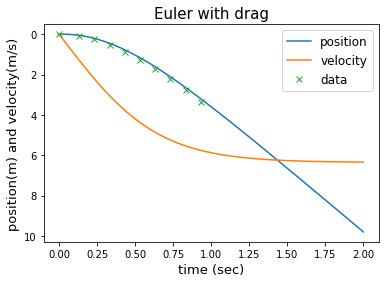

In [30]:
#Graph for Euler w/ drag
plt.plot(time_d,xd,label = "position")
plt.plot(time_d,vd,label = "velocity")
plt.plot(ts,zs,"x",label = "data")
plt.legend(fontsize = 12)
plt.gca().invert_yaxis()
plt.title("Euler with drag",fontsize = 15)
plt.xlabel("time (sec)",fontsize = 13)
plt.ylabel("position(m) and velocity(m/s)",fontsize = 13)

### Exercise 2: Accent and descent of a pebble

1. Compute the speed at which a pebble reaches the ground if it is dropped from a height of 50 m.  Compare with a freely falling object (no air resistance).  Assume that the terminal speed of the pebble is 30 m/s.

2. Now throw the pebble vertically upward with an initial velocity $v_0$.  The maximum height (no air resistance) reached by an object is $v_0^2/2g$, and its velocity upon return to Earth is $v_0$.  The time of ascent equals descent, and the total time in the air is $2v_0/g$. How does air resistance affect your result?  Hint: watch out for the *sign* of the velocity in the drag force. 


Text(0, 0.5, 'velocity (m/s)')

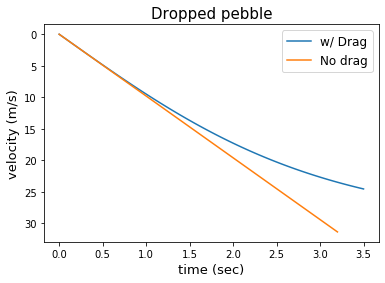

In [31]:
#Ex.2;part1: Dropped pebble from 50m
v_tp = 30            #pebble terminal velocity (m/s)
hp = 50              #starting height of pebbel (meters)

#recalling functions with new pebble specific variables
[xr,vr,time_r] = euler_no_drag(x0,v0,hp,dt)
[xdp,vdp,time_dp] = euler_drag(x0,v0,t,hp,dt,v_tp)

#plotting dropped pebble graph
plt.plot(time_dp,vdp,label = "w/ Drag")
plt.plot(time_r,vr, label = "No drag")
plt.legend(fontsize = 12)
plt.gca().invert_yaxis()
plt.title("Dropped pebble",fontsize = 15)
plt.xlabel("time (sec)",fontsize = 13)
plt.ylabel("velocity (m/s)",fontsize = 13)

Text(0, 0.5, 'position(m) and velocity(m/s)')

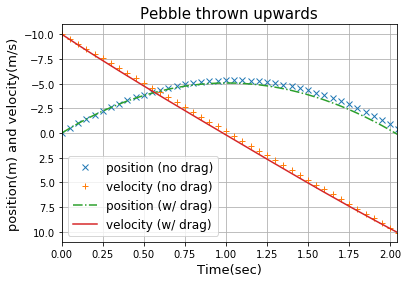

In [32]:
#Ex.2;part 2: Pebble thrown upwards w/ some intitial velocity
v0_p = -10                         #initial upward thrown velocity
h_p = v0_p**2/2*g                  #max height (w/o drag)
x0 = 0                             #initial position

#recalling functions with specific variables
[xtp,vtp,時tp] = euler_no_drag(x0,v0_p,h_p,dt)                #Discovery!: it is possible to use foreign language characters as variables! 
[xdtp,vdtp,時dtp] = euler_drag(x0,v0_p,t,h_p,dt,v_tp)         #時 is the Chinese character for time

#plotting graph for pebble first thrown upwards
plt.plot(時tp,xtp,"x",label = "position (no drag)")
plt.plot(時tp,vtp,"+",label = "velocity (no drag)")
plt.plot(時dtp,xdtp,"-.",label = "position (w/ drag)")
plt.plot(時dtp,vdtp,label = "velocity (w/ drag)")
plt.xlim(0,2*np.abs(v0_p)/g)         #shortening x-axis so that time ends at 2v0/g
plt.ylim(-11,11) 
plt.grid()
plt.gca().invert_yaxis()
plt.legend(fontsize = 12)
plt.title("Pebble thrown upwards",fontsize = 15)
plt.xlabel("Time(sec)",fontsize = 13)
plt.ylabel("position(m) and velocity(m/s)",fontsize = 13)

## 2-D motion
- Newton's equations of motion for $x$ and $z$ components of
  motion are
\begin{eqnarray*}
m \frac{d v_x}{dt} &=& - F_d \cos\theta\\
m \frac{d v_z}{dt} & = & - mg - F_d \sin \theta
\end{eqnarray*}
- Since $v_x = v \cos \theta$ and $v_z = \sin \theta$, this can be
  rewritten as
\begin{eqnarray*}
 \frac{d v_x}{dt} &=& - \frac{k}{m} v (v \cos\theta) = - \frac{k}{m} v v_x\\
\frac{d v_z}{dt} & = & - g - \frac{k}{m} v (v \sin \theta)= - g - \frac{k}{m} v v_z
\end{eqnarray*}
- Note that both equations involve the magnitude of the velocity,
  $v^2 = v_x^2 + v_z^2$.  Hence, we cannot calculate the vertical
  motion without reference to the horizontal component.

  

## Exercise 3:  Two-dimensional trajectories

1. Modify your code  so that the two-dimensional trajectory of a ball moving in the air is computed.

2. First compare your results with the expected result without air resistance.  Let $\theta_0 = 15^\circ$ and $v_0$ = 15 m/s.  Vary $\theta_0$ and show that the range is maximized when $\theta_0 \approx 45^\circ$.

3. Repeat part 2, but now suppose the ball is thrown from a height $h$ at an angle $\theta_0$ above the horizontal with $v_0 = 15$ m/s.  Numerically determine the angle $\theta_0$  that maximizes range.

4. Finally, consider the effects of air resistance on the optimum range and launch angle.  Estimate the value of $k/m$ (a realistic value for a shot put is $\sim$0.001, but choose any type of ball that you like!).  It might be helpful to initially exaggerate the effects of air resistance.

Expected trajectory distance @ 15° : 11.46788990825688 meters
Euler trajectory distance @ 15° : 11.59110991546882 meters


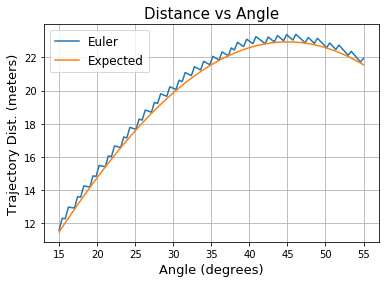

In [33]:
# 2-D motion
#Ex.3;part1/part2: Modifying the code/comparing when launched at 15deg and 15m/s
#-----------------------------------Variables-------------------------------------------------------------------------------
度0 = 15                               #Launch angle (in degrees) (度=degrees)
v全0 = 15                              #complete initial velocity (with BOTH x & z components)(m/s) (全=all/whole)
vx0 = v全0*np.cos(np.deg2rad(度0))     #x velocity component (converted degrees to radians b/c sin & cos is calculated w/ rad)
vz0 = -v全0*np.sin(np.deg2rad(度0))    #z vel. component (negative b/c up is negative)
g = 9.81                               #m/s^2
h = (vz0**2)/(2*g)                     #max height (my equation from hw2)
x0 = 0                                 #initial x position
z0 = 0                                 #initial z position (or initial height)
dt = 0.05
#----------------------------Expected values (My functions derived from HW2)-----------------------------------------------------------
def exp_時(vz0,g):                     #TOTAL time of flight
    return (2*np.abs(vz0))/g
e時 = exp_時(vz0,g)

def dist(vx0,e時):                     #Total distance in x travelled
    return vx0*e時

#-----------------------------------------2D Euler w/o Drag-----------------------------------------------------------------
def euler_2D_空無(x0,z0,vx0,vz0,h,dt):          #空 = air, 無 = none (no air resistance)        
    vx = vx0         #With no air resistance velocity in x never changes  
    vz = []          #initialize an array for the z velocity output
    x = []           #initialize an array for the x position output
    z = []           #initialize an array for the z position output
    xp = 0.724       #n+1 x value
    zp = -0.194      #n+1 z value
    while zp <= 0.0:      #run until while zp is less than (since up is negative) or equal to 0.0 (ground level)
        vz.append(vz0)
        x.append(x0)
        z.append(z0)
        vzp = vz0 + g*dt           #velocity update      
        zp = z0 + vz0*dt           #z position update
        xp = x0 + vx0*dt           #x position update                             
        vz0 = vzp                  #update the velocity, v^n = v^n+1
        x0 = xp                    #update the position, x^n = x^n+1
        z0 = zp
    return x[-1]                   #only want finishing trajectory distance, so taking only last distance array value

#Loop to compare trajectory distances w/ varying angles--------------------------------------------------------------------

alpha = np.linspace(15,55,100)          #testing angles 15-60 degress

vxa=[]                                  #array for x intial velocity with varying angles
vza=[]                                  #array for z intial velocity with varying angles
xa = []                                 #array for total trajectory distance for varying angles (Euler)
et = []                                 #array for expected total time of flight 
exa = []                                #array for expected total traj. dist. for varying angles (Not Euler)
for i in range(0,len(alpha)):
    #Euler
    #adding to initial velocity component arrays
    alp = alpha[i]
    vxp = v全0*np.cos(np.deg2rad(alp))
    vzp = -v全0*np.sin(np.deg2rad(alp)) 
    vx = vxp
    vz = vzp
    vxa.append(vx)
    vza.append(vz)
    #adding to Euler travelled dist. array using initial velocity components with varying angles
    速x = vxa[i]
    速z = vza[i]
    xap = euler_2D_空無(x0,z0,速x,速z,h,dt)
    xaa = xap
    xa.append(xaa)
    #Expected (non-Euler)
    #Expected total time
    etp = exp_時(np.abs(速z),g)
    eta = etp
    et.append(eta)
    #adding to expected distance travelled array
    etd = et[i]
    exap = dist(速x,etd)
    exaa = exap
    exa.append(exaa)

#Expected vs. Euler print statements----------------------------------------------------------------------------------------
print("Expected trajectory distance @ 15\xb0 :",dist(vx0,e時),"meters")
print("Euler trajectory distance @ 15\xb0 :",euler_2D_空無(x0,z0,vx0,vz0,h,dt),"meters")

#Graphing Trajectory dist. vs Angle-----------------------------------------------------------------------------------------
plt.plot(alpha,xa,label = "Euler") 
plt.plot(alpha,exa, label = "Expected")    
plt.title("Distance vs Angle", fontsize = 15)        
plt.xlabel("Angle (degrees)", fontsize = 13)
plt.ylabel("Trajectory Dist. (meters)", fontsize = 13)
plt.legend(fontsize = 12)
plt.grid()

Angle that gives maximum range =  [36.81818182] °


Text(0, 0.5, 'Distance travelled (m)')

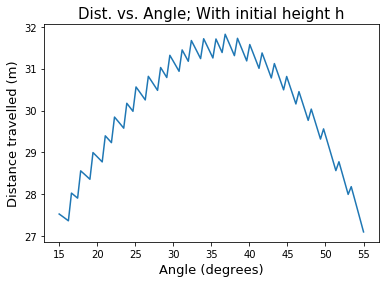

In [34]:
#Ex.3;Part 3: Changing initial height
zi = -10               #New starting height (meters)

alpha = np.linspace(15,55,100)          #testing angles 15-60 degress
vxh=[]                                  #array for x intial velocity with varying angles
vzh=[]                                  #array for z intial velocity with varying angles
xh = []                                 #array for total trajectory distance for varying angles 
for i in range(0,len(alpha)):
    #Euler
    #adding to initial velocity component arrays
    alp = alpha[i]
    vxp = v全0*np.cos(np.deg2rad(alp))
    vzp = -v全0*np.sin(np.deg2rad(alp)) 
    vx = vxp
    vz = vzp
    vxh.append(vx)
    vzh.append(vz)
    #adding to Euler travelled dist. array using initial velocity components with varying angles
    速x = vxa[i]
    速z = vza[i]
    xap = euler_2D_空無(x0,zi,速x,速z,h,dt)
    xaa = xap
    xh.append(xaa)
    
#Finding angle value that gives maximum distance----------------------------------------------------------------------------
度 = np.where(xh == np.amax(xh))             #finding at what index of the xa array has the max value
al = alpha[度]

print("Angle that gives maximum range = ",al,"\xb0")

#Graph for verification-----------------------------------------------------------------------------------------------------
plt.plot(alpha,xh)
plt.title("Dist. vs. Angle; With initial height h",fontsize = 15)
plt.xlabel("Angle (degrees)",fontsize = 13)
plt.ylabel("Distance travelled (m)",fontsize = 13)

Text(0, 0.5, 'Dist. travelled (m)')

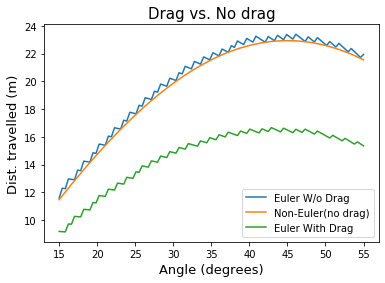

In [35]:
#Ex.3;Part 4: Comparing Drag vs. no Drag
#-------------------------------------------Set up for k/m------------------------------------------------------------------
Cd = 0.47            #avg. drag coefficient of a sphere according to wikipedia
Rh = 0.145           #air density (kg/m^3)
r = 0.03             #radius (meters)
A = np.pi*(r**2)     #Cross sectional area
k = (Cd*Rh*A)/2      #kappa 
m= 0.005             #mass of ball (kg)

km = k/m
#------------------------------------------2D Euler w/ Drag----------------------------------------------------------------
度0 = 15                               #Launch angle (in degrees) 
v全0 = 15                              #complete initial velocity (with BOTH x & z components)(m/s)
vx0 = v全0*np.cos(np.deg2rad(度0))     #x velocity component (converted degrees to radians b/c sin & cos is calculated w/ rad)
vz0 = -v全0*np.sin(np.deg2rad(度0))    #z vel. component (negative b/c up is negative)
g = 9.81                               #m/s^2
h = (vz0**2)/(2*g)                     #max height (my equation from hw2)
x0 = 0                                 #initial x position
z0 = 0                                 #initial z position (or initial height)
dt = 0.05
def euler_2D_空(x0,z0,vx0,vz0,h,dt):                  
    vx = []          #initialize an array for the x velocity output  
    vz = []          #initialize an array for the z velocity output
    x = []           #initialize an array for the x position output
    z = []           #initialize an array for the z position output
    xp = 0.724       #n+1 x value
    zp = -0.194      #n+1 z value
    t = 0.0          #initial time
    while zp <= 0.0:    #run until object reaches the ground, watch out for infinite loops!
        vx.append(vx0)
        vz.append(vz0)
        x.append(x0)
        z.append(z0)   
        vp = np.sqrt(vx0**2 + vz0**2)
        v全 = vp
        vxp = vx0 -(km*v全*vx0)*dt 
        vzp = vz0 + (g-(km*v全*vz0))*dt  #velocity update
        vx0 = vxp                        #update the velocity, v^n = v^n+1
        vz0 = vzp
        zp = z0 + vz0*dt                 #position update  
        xp = x0 + vx0*dt                  
        x0 = xp                          #update the position, x^n = x^n+1
        z0 = zp
        t = t+dt                         #update time
    return x[-1]
#Loop for varying angles----------------------------------------------------------------------------------------------------
alpha = np.linspace(15,55,100)           #testing angles 15-60 degress
vxd=[]                                   #array for x intial velocity with varying angles
vzd=[]                                   #array for z intial velocity with varying angles
xd = []                                  #array for total trajectory distance for varying angles 
for i in range(0,len(alpha)):
    #Euler
    #adding to initial velocity component arrays
    alp = alpha[i]
    vxp = v全0*np.cos(np.deg2rad(alp))
    vzp = -v全0*np.sin(np.deg2rad(alp)) 
    vx = vxp
    vz = vzp
    vxd.append(vx)
    vzd.append(vz)
    #adding to Euler travelled dist. array using initial velocity components with varying angles
    速x = vxa[i]
    速z = vza[i]
    xap = euler_2D_空(x0,z0,速x,速z,h,dt)
    xaa = xap
    xd.append(xaa)
#Graphing for Drag vs. no drag comparison (for specific ball, w/ specific air resistance as defined by k/m)----------------
plt.plot(alpha,xa,label = "Euler W/o Drag")
plt.plot(alpha,exa,label = "Non-Euler(no drag)")
plt.plot(alpha,xd,label = "Euler With Drag")
plt.legend()
plt.title("Drag vs. No drag",fontsize = 15)
plt.xlabel("Angle (degrees)",fontsize = 13)
plt.ylabel("Dist. travelled (m)",fontsize = 13)

In [36]:
#Comparing angles of max distance (drag vs. no drag)------------------------------------------------------------------------
度d = np.where(xd == np.amax(xd))               #finding at what index of the xd array has the max value
ald = alpha[度d]                                #Angle for max value
e度 = np.where(exa == np.amax(exa))             #finding at what index of the exa array has the max value
eal = alpha[e度]                                #Angle for max value
度 = np.where(xa == np.amax(xa))                #finding at what index of the xa array has the max value
al = alpha[度]                                  ##Angle for max value
#---------------------------------------------------------------------------------------------------------------------------
print("Expected max range angle =",eal,"\xb0")
print("Euler no drag max range angle =",al,"\xb0")
print("Euler WITH drag max range angle = ",ald,"\xb0")

Expected max range angle = [44.8989899] °
Euler no drag max range angle = [46.11111111] °
Euler WITH drag max range angle =  [42.87878788] °
